**Libraries Needed :**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import seaborn as sns
sns.set()


**Reading the CSV file :**

In [2]:
df = pd.read_csv('/Users/saifhaddad/Downloads/WSNBFSFdataset V2.csv')
df.head()

Event      Time  S_Node  Node_id  Rest_Energy  Trace_Level  Mac_Type_Pckt  \
0      1  0.100000      79       79   600.000000            5              0   
1      2  0.100963      78       78   599.979723            5            800   
2      2  0.100963      76       76   599.979722            5            800   
3      2  0.100964      75       75   599.979722            5            800   
4      2  0.100964     118      118   599.979722            5            800   

   Source_IP_Port  Des_IP_Port  Packet_Size  ...  Broadcast_ID  Dest_Node_Num  \
0          79.255        1.255           48  ...             1            100   
1          79.255        1.255           48  ...             1            100   
2          79.255        1.255           48  ...             1            100   
3          79.255        1.255           48  ...             1            100   
4          79.255        1.255           48  ...             1            100   

   Dest_Seq_Num  Src_Node_ID  Src_Seq_Num  behaviour    Type  \
0             0           79            4  No attack  normal   
1             0           79            4  No attack  normal   
2             0           79            4  No attack  normal   
3             0           79            4  No attack  normal   
4             0           79            4  No attack  normal   

  rate_of_energy_consumption cumulative_energy_consumption  energy_consumption  
0                        0.0                           0.0                 0.0  
1                        0.0                           0.0                 0.0  
2                        0.0                           0.0                 0.0  
3                        0.0                           0.0                 0.0  
4                        0.0                           0.0                 0.0  

[5 rows x 22 columns]

**Checking for null values :**

In [3]:
# Discovere if there are null values :)
df.isna().any()

Event                            False
Time                             False
S_Node                           False
Node_id                          False
Rest_Energy                      False
Trace_Level                      False
Mac_Type_Pckt                    False
Source_IP_Port                   False
Des_IP_Port                      False
Packet_Size                      False
TTL                              False
Hop_Count                        False
Broadcast_ID                     False
Dest_Node_Num                    False
Dest_Seq_Num                     False
Src_Node_ID                      False
Src_Seq_Num                      False
behaviour                        False
Type                             False
rate_of_energy_consumption       False
cumulative_energy_consumption    False
energy_consumption               False
dtype: bool

**Encoding from categorical to numeric :**

In [4]:
# Mapping behaviour & Type Columns :)
df['behaviour'].replace({'No attack':0,'Under attack':1},inplace=True)
df['Type'].replace({'normal':0,'Flooding':1,'Blackhole':2,'Forwarding':3},inplace=True)

**Splitting the data set :**

In [5]:
# storing the input values in the X variable
X = df.drop(["TTL"], axis=1)

# storing all the ouputs in y variable
y_TTL = df["TTL"]


# Calculate 'mean_absolute_error' MAE
from sklearn.metrics import mean_absolute_error
MAE = []

# ..........
print(f"ny_TTL shape:{y_TTL.shape}")

ny_TTL shape:(312106,)


**Split the TTL to Test and Train**

**Scaling the values between 0-1 :**

In [6]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = df.columns.drop("TTL"))

**SelectKBest for the TTL :  (Feature selection)**

Finding the best K value for the Kbest feature selection :

In [7]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Number of Features (k)', 'R-squared', 'Selected Features'])

# Create a range of k values you want to try
k_values = range(1, len(X.columns) - 1)

for k in k_values:
    # Instantiate the feature selection model for TTL prediction
    selector_TTL = SelectKBest(score_func=f_regression, k=k)
    # Split the data into training and testing sets
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X, y_TTL, test_size=0.2, random_state=k)
    # Fit the model on the training data for TTL prediction
    selector_TTL.fit(X_train_TTL, y_train_TTL)

    # Transform the training and testing sets for TTL prediction to keep only the selected features
    X_train_selected_TTL_Kbest = selector_TTL.transform(X_train_TTL)
    X_test_selected_TTL_Kbest = selector_TTL.transform(X_test_TTL)

    # Get the indices of the selected features
    selected_feature_indices_TTL = selector_TTL.get_support(indices=True)

    # Get the names of the selected features
    selected_features_TTL = X_train_TTL.columns[selected_feature_indices_TTL]

    
    model_TTL_Dtr = DecisionTreeRegressor(max_depth=None, random_state=0)  # You can adjust max_depth as needed
    model_TTL_Dtr.fit(X_train_selected_TTL_Kbest, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Dtr = model_TTL_Dtr.predict(X_test_selected_TTL_Kbest)

    
    r2 = r2_score(y_test_TTL, y_pred_TTL_Dtr)


    '''# Create and train a linear regression model
    model = LinearRegression()
    model.fit(X_train_selected_TTL_Kbest, y_train_TTL)

    # Predict using the model
    y_pred_TTL = model.predict(X_test_selected_TTL_Kbest)

    # Calculate R-squared score
    r2 = r2_score(y_test_TTL, y_pred_TTL)'''

    # Append results to the DataFrame
    results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)

# Print the DataFrame with results
print(results_df)

# Find the row with the highest R-squared value
best_result = results_df.loc[results_df['R-squared'].idxmax()]




/var/folders/sb/6phfnpsd4vbd52mr5kht86kw0000gn/T/ipykernel_64128/1542868234.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)
/var/folders/sb/6phfnpsd4vbd52mr5kht86kw0000gn/T/ipykernel_64128/1542868234.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)
/var/folders/sb/6phfnpsd4vbd52mr5kht86kw0000gn/T/ipykernel_64128/1542868234.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Features (k)': k, '

   Number of Features (k)  R-squared  \
0                       1   0.614346   
1                       2   0.870531   
2                       3   0.949196   
3                       4   1.000000   
4                       5   1.000000   
5                       6   1.000000   
6                       7   1.000000   
7                       8   1.000000   
8                       9   1.000000   
9                      10   1.000000   
10                     11   1.000000   
11                     12   1.000000   
12                     13   1.000000   
13                     14   1.000000   
14                     15   0.999999   
15                     16   1.000000   
16                     17   1.000000   
17                     18   1.000000   
18                     19   1.000000   

                                    Selected Features  
0             Index(['Dest_Seq_Num'], dtype='object')  
1   Index(['Hop_Count', 'Dest_Seq_Num'], dtype='ob...  
2   Index(['Hop_Count', 'Dest_S

/var/folders/sb/6phfnpsd4vbd52mr5kht86kw0000gn/T/ipykernel_64128/1542868234.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Features (k)': k, 'R-squared': r2, 'Selected Features': selected_features_TTL}, ignore_index=True)


In [8]:
# Best K => 14
# Columns which is selected :)
selected_feature_indices_TTL_Kbest = results_df[results_df['Number of Features (k)']==15]['Selected Features']
# selected_feature_indices_TTL_Kbest
selected_feature_indices_TTL_Kbest.values

array([Index(['Time', 'S_Node', 'Node_id', 'Mac_Type_Pckt', 'Source_IP_Port',
              'Packet_Size', 'Hop_Count', 'Broadcast_ID', 'Dest_Node_Num',
              'Dest_Seq_Num', 'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type',
              'energy_consumption'],
             dtype='object')                                                    ],
      dtype=object)

In [9]:
# Best Feature :)
selected_features_TTL_Kbest = X[['Time', 'S_Node', 'Node_id', 'Mac_Type_Pckt', 'Source_IP_Port',
              'Packet_Size', 'Hop_Count', 'Broadcast_ID', 'Dest_Node_Num',
              'Dest_Seq_Num', 'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type',
              'energy_consumption']]
selected_features_TTL_Kbest

Time    S_Node   Node_id  Mac_Type_Pckt  Source_IP_Port  \
0       0.000000  0.396985  0.396985            0.0        0.396985   
1       0.000001  0.391960  0.391960            1.0        0.396985   
2       0.000001  0.381910  0.381910            1.0        0.396985   
3       0.000001  0.376884  0.376884            1.0        0.396985   
4       0.000001  0.592965  0.592965            1.0        0.396985   
...          ...       ...       ...            ...             ...   
312101  0.966819  0.703518  0.703518            1.0        0.703518   
312102  0.967825  0.703518  0.703518            1.0        0.703518   
312103  0.968830  0.703518  0.703518            1.0        0.703518   
312104  0.969836  0.703518  0.703518            1.0        0.703518   
312105  1.000000  0.703518  0.703518            1.0        0.703518   

        Packet_Size  Hop_Count  Broadcast_ID  Dest_Node_Num  Dest_Seq_Num  \
0               0.0        0.0      0.000000       0.392638      0.000000   
1               0.0        0.0      0.000000       0.392638      0.000000   
2               0.0        0.0      0.000000       0.392638      0.000000   
3               0.0        0.0      0.000000       0.392638      0.000000   
4               0.0        0.0      0.000000       0.392638      0.000000   
...             ...        ...           ...            ...           ...   
312101          0.0        0.0      0.434783       0.392638      0.941176   
312102          0.0        0.0      0.463768       0.392638      0.941176   
312103          0.0        0.0      0.492754       0.392638      0.941176   
312104          0.0        0.0      0.521739       0.392638      0.941176   
312105          0.0        0.0      0.594203       0.392638      0.941176   

        Src_Node_ID  Src_Seq_Num  behaviour      Type  energy_consumption  
0          0.420213     0.000000        0.0  0.000000            0.000000  
1          0.420213     0.000000        0.0  0.000000            0.000000  
2          0.420213     0.000000        0.0  0.000000            0.000000  
3          0.420213     0.000000        0.0  0.000000            0.000000  
4          0.420213     0.000000        0.0  0.000000            0.000000  
...             ...          ...        ...       ...                 ...  
312101     0.744681     0.457143        1.0  0.666667            0.018874  
312102     0.744681     0.485714        1.0  0.666667            0.018874  
312103     0.744681     0.514286        1.0  0.666667            0.018847  
312104     0.744681     0.542857        1.0  0.666667            0.018870  
312105     0.744681     0.614286        1.0  0.666667            0.565886  

[312106 rows x 15 columns]

In [10]:
#Instantiate the feature selection model for TTL prediction
#selector_TTL = SelectKBest(score_func=f_regression, k=14)

# Fit the model on the training data for TTL prediction
#selector_TTL.fit(X_train_scaled_TTL, y_train_TTL)

# Transform the training and testing sets for TTL prediction to keep only the selected features
#X_train_selected_TTL_Kbest = selector_TTL.transform(X_train_scaled_TTL)
#X_test_selected_TTL_Kbest = selector_TTL.transform(X_test_scaled_TTL)


# Printing selected features for TTL prediction
#print("Selected features for TTL prediction:")
#selected_feature_indices_TTL_Kbest = selector_TTL.get_support(indices=True)
#selected_features_TTL_Kbest = X.columns[selected_feature_indices_TTL_Kbest]
#print(selected_features_TTL_Kbest)

In [66]:
from scipy.stats import zscore
import numpy as np

# Calculate the Z-score
z_scores = np.abs(zscore(df))

# Get boolean array indicating presence of outliers
outliers = (z_scores > 3).any(axis=1)

# Count the number of outliers
num_outliers = np.sum(outliers)

print(f"Number of outliers detected: {num_outliers}")


Number of outliers detected: 41332


In [67]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()

print(f"Number of outliers detected: {num_outliers}")


Number of outliers detected: 152022


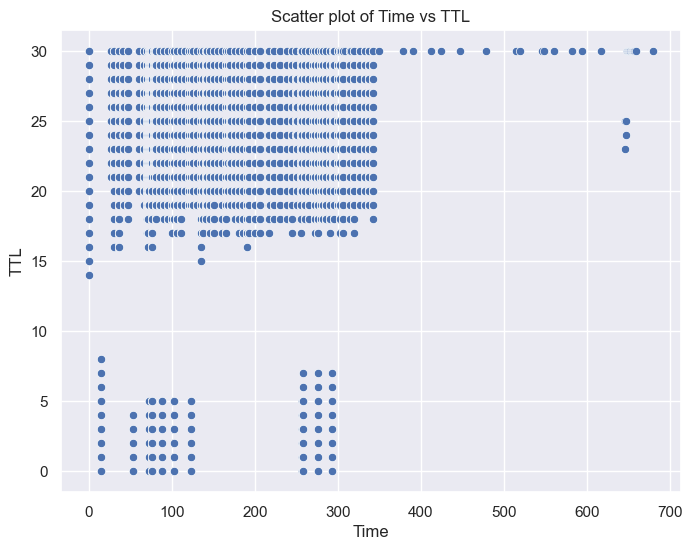

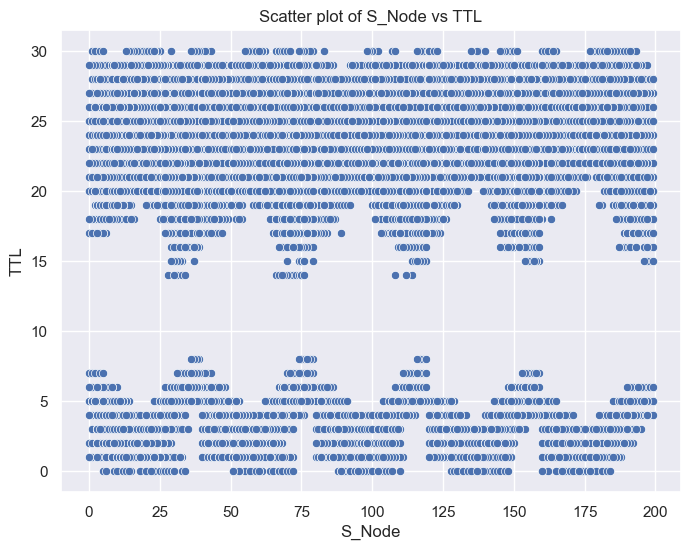

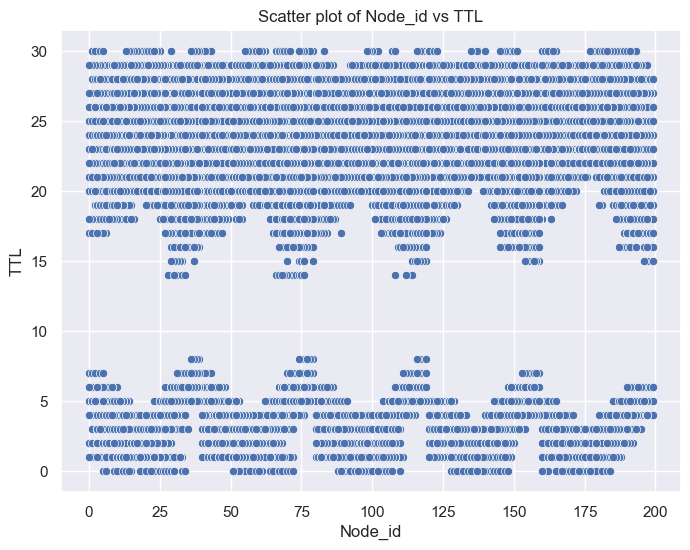

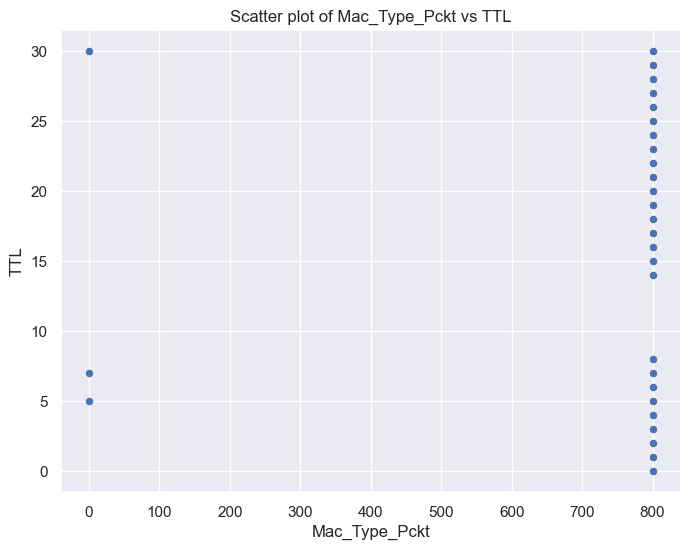

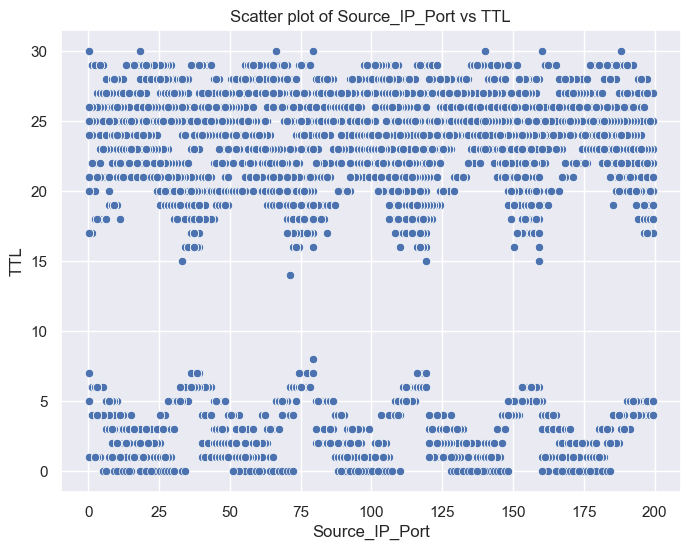

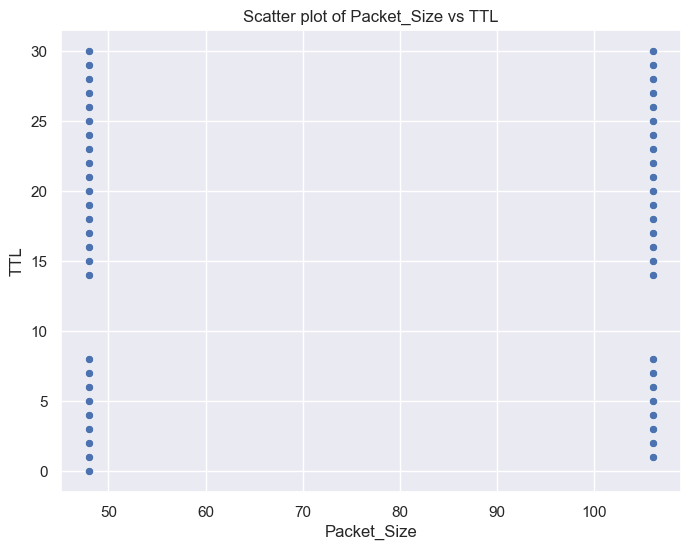

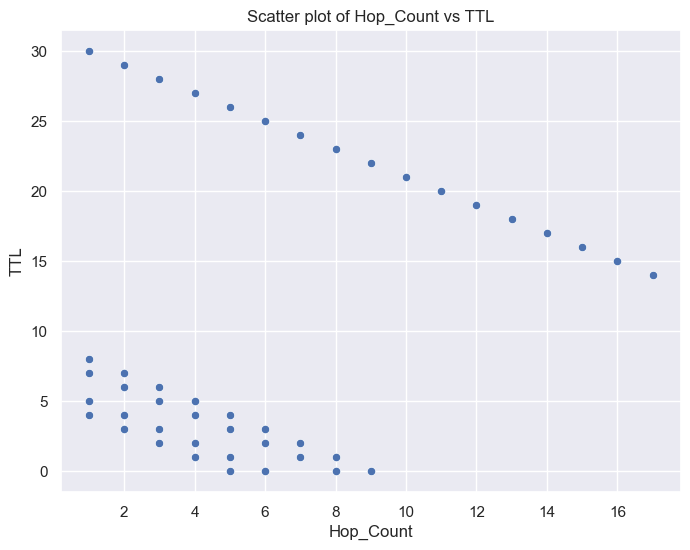

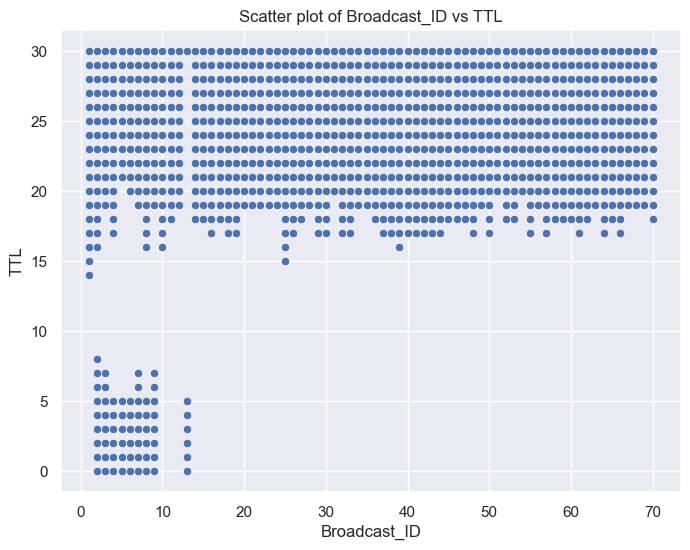

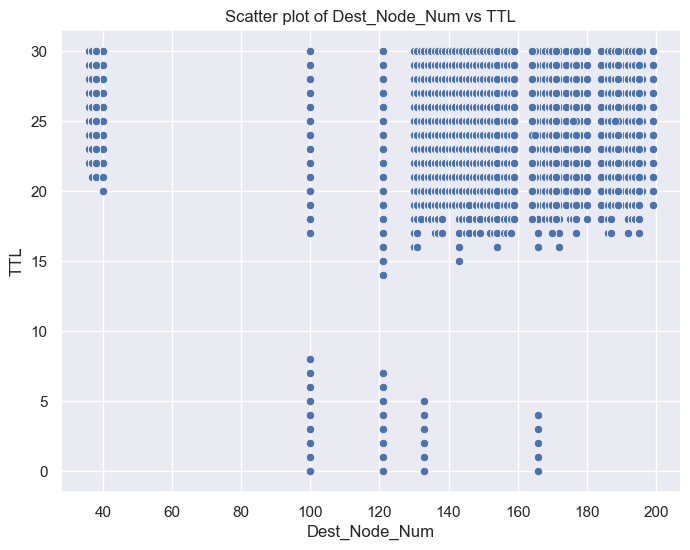

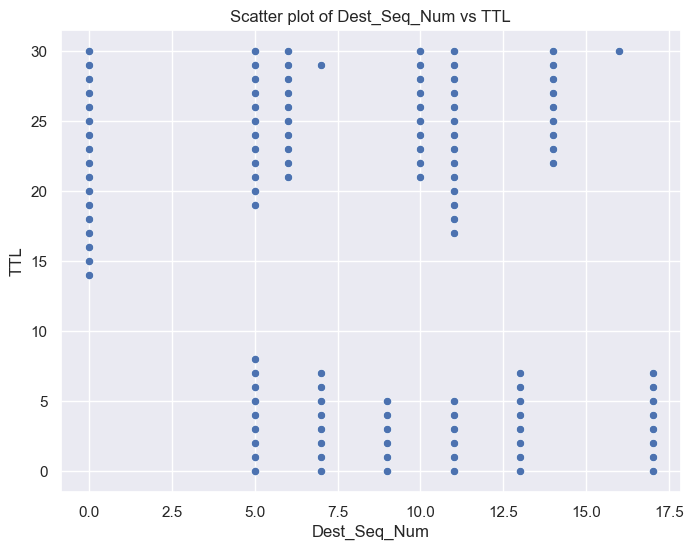

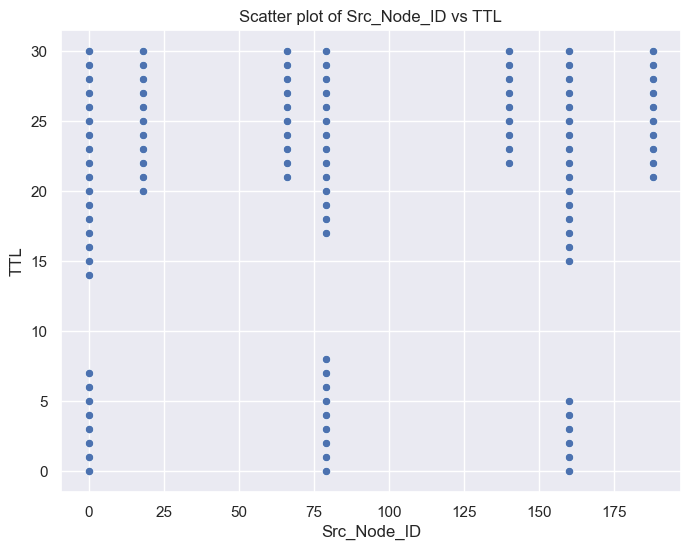

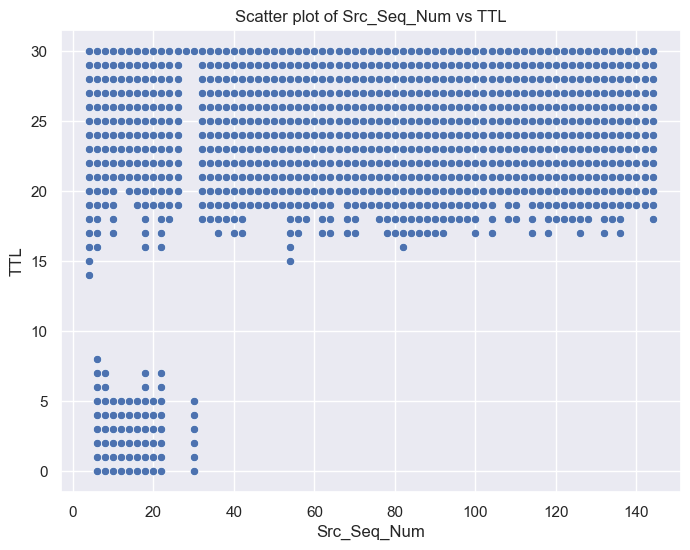

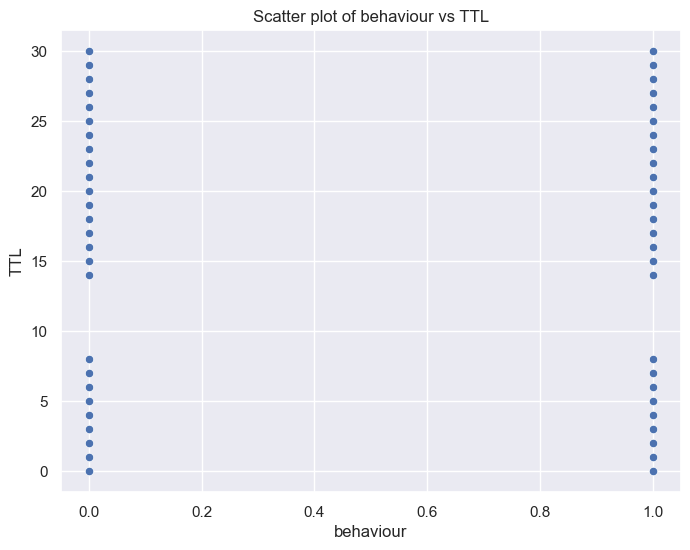

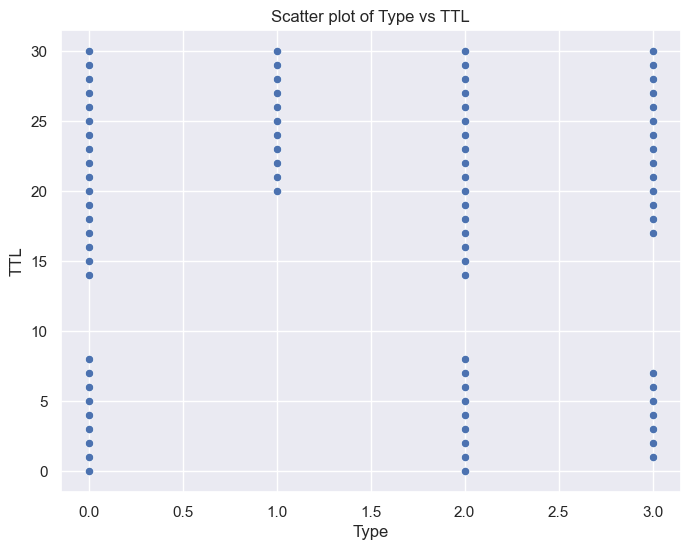

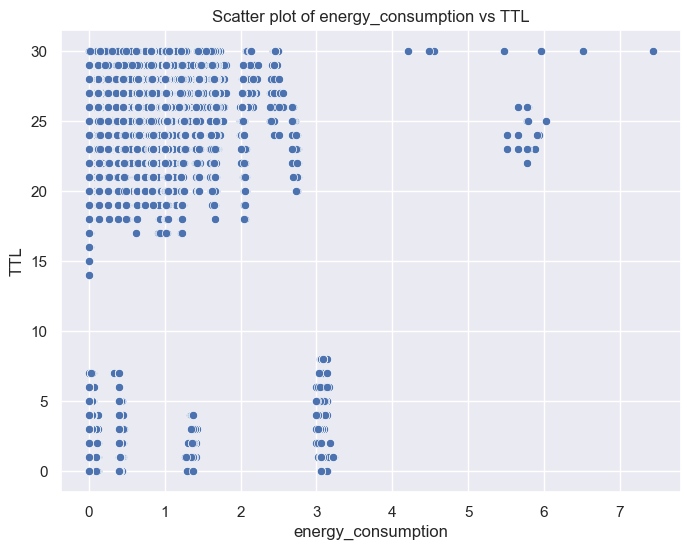

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Your existing DataFrame selections
X = selected_features_TTL_Kbest  # Features based on KBest selection
y_TTL = df["TTL"]  # Target variable

# Plotting scatter plots
features = X.columns

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='TTL')
    plt.title(f'Scatter plot of {feature} vs TTL')
    plt.show()


**Linear regression model for TTL using Kbest**

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_Lr_Kbest = []
mae_scores_Lr_Kbest = []
mse_scores_Lr_Kbest = []
rmse_scores_Lr_Kbest = []

# Perform the process for 30 runs
for i in range(30):

    # Split the data into training and testing sets
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(selected_features_TTL_Kbest, y_TTL, test_size=0.2, random_state=i)
    # Train a linear regression model on the selected features for TTL prediction
    model_TTL_Lr = LinearRegression()
    model_TTL_Lr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Lr = model_TTL_Lr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Lr_Kbest = mean_absolute_error(y_test_TTL, y_pred_TTL_Lr)
    mse_TTL_Lr_Kbest = mean_squared_error(y_test_TTL, y_pred_TTL_Lr)
    rmse_TTL_Lr_Kbest = mean_squared_error(y_test_TTL, y_pred_TTL_Lr, squared=False)
    r2_TTL_Lr_Kbest = r2_score(y_test_TTL, y_pred_TTL_Lr)

    # Append metrics to respective lists
    r2_scores_Lr_Kbest.append(r2_TTL_Lr_Kbest)
    mae_scores_Lr_Kbest.append(mae_TTL_Lr_Kbest)
    mse_scores_Lr_Kbest.append(mse_TTL_Lr_Kbest)
    rmse_scores_Lr_Kbest.append(rmse_TTL_Lr_Kbest)

# Calculate the average metrics
average_r2_Lr_Kbest = np.mean(r2_scores_Lr_Kbest)
average_mae_Lr_Kbest = np.mean(mae_scores_Lr_Kbest)
average_mse_Lr_Kbest = np.mean(mse_scores_Lr_Kbest)
average_rmse_Lr_Kbest = np.mean(rmse_scores_Lr_Kbest)

# Print average metrics
print("Average R-squared score (LR_Kbest) for TTL prediction:", average_r2_Lr_Kbest)
print("Average MAE score (LR_Kbest) for TTL prediction:", average_mae_Lr_Kbest)
print("Average MSE score (LR_Kbest) for TTL prediction:", average_mse_Lr_Kbest)
print("Average RMSE score (LR_Kbest) for TTL prediction:", average_rmse_Lr_Kbest)

# # Append results to respective lists
# scorelist_r2_bar.append(average_r2_Lr_Kbest)
# algorthim_r2_bar.append("LR_Kbest")
# feature_r2_bar.append("TTL")

# # Append to lists
# scorelist_mae_bar.append(average_mae_Lr_Kbest)
# algorthim_mae_bar.append("LR_Kbest")
# feature_mae_bar.append("TTL")

# # Append to lists
# scorelist_r2_box.append(r2_scores_Lr_Kbest)
# algorthim_r2_box.append("LR_Kbest")
# feature_r2_box.append("TTL")

# # Append to lists
# scorelist_mae_box.append(mae_scores_Lr_Kbest)
# algorthim_mae_box.append("LR_Kbest")
# feature_mae_box.append("TTL")

MAE.append(average_mae_Lr_Kbest)

 


Average R-squared score (LR_Kbest) for TTL prediction: 0.6160953729756221
Average MAE score (LR_Kbest) for TTL prediction: 1.549328418525479
Average MSE score (LR_Kbest) for TTL prediction: 12.497669378951409
Average RMSE score (LR_Kbest) for TTL prediction: 3.5351374702150737


In [14]:
r2_scores_Lr_Kbest


[0.616404898297046,
 0.6115954108937875,
 0.6156633486821803,
 0.6142637438949723,
 0.6189275088654391,
 0.6137574113537622,
 0.6197351794689625,
 0.6153060822617877,
 0.6214644725512923,
 0.6101927790672355,
 0.6100527312039075,
 0.608237070392146,
 0.6157541899789135,
 0.6195140577677305,
 0.6149108540969306,
 0.6105552462756767,
 0.6175118329500139,
 0.6063310620816466,
 0.6133795766305603,
 0.6218728344831959,
 0.6216379626502078,
 0.6206886009999835,
 0.6111176975102073,
 0.6159714531236631,
 0.6225961950907786,
 0.6224272584189536,
 0.6223003823929762,
 0.6190060001595714,
 0.6135641005262128,
 0.6181212471989261]

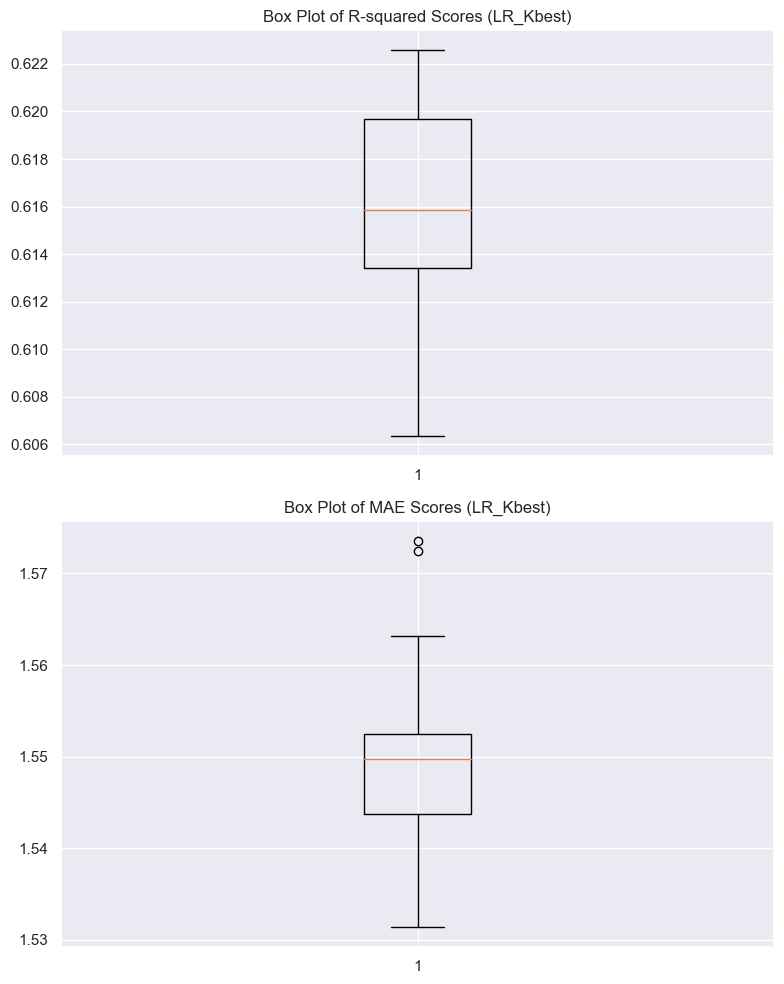

In [15]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Create box plots for R2 scores and MAE scores
axes[0].boxplot(r2_scores_Lr_Kbest)
axes[0].set_title("Box Plot of R-squared Scores (LR_Kbest)")

axes[1].boxplot(mae_scores_Lr_Kbest)
axes[1].set_title("Box Plot of MAE Scores (LR_Kbest)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**KNN model for TTL using Kbest**

In [16]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Initialize lists to store results
# r2_scores_Knn_Kbest = []
# mae_scores_Knn_Kbest = []
# mse_scores_Knn_Kbest = []
# rmse_scores_Knn_Kbest = []

# # Perform the process for 30 runs
# for i in range(30):

#     X_train_selected_TTL_Kbest, X_test_selected_TTL_Kbest, y_train_TTL, y_test_TTL= train_test_split(selected_features_TTL_Kbest, y_TTL, test_size=0.2,random_state=i)

#     # Train a KNN model on the selected features for TTL prediction
#     model_TTL_Knn = KNeighborsRegressor(n_neighbors=3)  # You can adjust n_neighbors as needed
#     model_TTL_Knn.fit(X_train_selected_TTL_Kbest, y_train_TTL)

#     # Make predictions on the testing set for TTL prediction
#     y_pred_TTL_Knn = model_TTL_Knn.predict(X_test_selected_TTL_Kbest)

#     # Calculate regression metrics for TTL prediction
#     mae_TTL_Knn_Kbest = mean_absolute_error(y_test_TTL, y_pred_TTL_Knn)
#     mse_TTL_Knn_Kbest = mean_squared_error(y_test_TTL, y_pred_TTL_Knn)
#     rmse_TTL_Knn_Kbest = mean_squared_error(y_test_TTL, y_pred_TTL_Knn, squared=False)
#     r2_TTL_Knn_Kbest = r2_score(y_test_TTL, y_pred_TTL_Knn)

#     # Append metrics to respective lists
#     r2_scores_Knn_Kbest.append(r2_TTL_Knn_Kbest)
#     mae_scores_Knn_Kbest.append(mae_TTL_Knn_Kbest)
#     mse_scores_Knn_Kbest.append(mse_TTL_Knn_Kbest)
#     rmse_scores_Knn_Kbest.append(rmse_TTL_Knn_Kbest)

# # Calculate the average metrics
# average_r2_Knn_Kbest = np.mean(r2_scores_Knn_Kbest)
# average_mae_Knn_Kbest = np.mean(mae_scores_Knn_Kbest)
# average_mse_Knn_Kbest = np.mean(mse_scores_Knn_Kbest)
# average_rmse_Knn_Kbest = np.mean(rmse_scores_Knn_Kbest)

# # Print the average metrics
# print("Average R2 score:", average_r2_Knn_Kbest)
# print("Average MAE:", average_mae_Knn_Kbest)
# print("Average MSE:", average_mse_Knn_Kbest)
# print("Average RMSE:", average_rmse_Knn_Kbest)

# # # Append to lists
# # scorelist_r2_bar.append(average_r2_Knn_Kbest)
# # algorthim_r2_bar.append("KNN_Kbest")
# # feature_r2_bar.append("TTL")

# MAE.append(average_mae_Knn_Kbest)

# # Append to lists
# #scorelist_mae_bar.append(average_mae_Knn_Kbest)
# #algorthim_mae_bar.append("KNN_Kbest")
# #feature_mae_bar.append("TTL")

# # Append to lists
# #scorelist_r2_box.append(r2_scores_Knn_Kbest)
# #algorthim_r2_box.append("KNN_Kbest")
# #feature_r2_box.append("TTL")

# # Append to lists
# #scorelist_mae_box.append(mae_scores_Knn_Kbest)
# #algorthim_mae_box.append("KNN_Kbest")
# #feature_mae_box.append("TTL")


In [17]:
# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# # Create box plots for R2 scores and MAE scores
# axes[0].boxplot(r2_scores_Knn_Kbest)
# axes[0].set_title("Box Plot of R-squared Scores (Knn_Kbest)")

# axes[1].boxplot(mae_scores_Knn_Kbest)
# axes[1].set_title("Box Plot of MAE Scores (Knn_Kbest)")

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

**Random Forest Regressor model for TTL using Kbest :**

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_RFR_Kbest = []
mae_scores_RFR_Kbest = []
mse_scores_RFR_Kbest = []
rmse_scores_RFR_Kbest = []

# Perform the process for 30 runs
for i in range(30):

    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(selected_features_TTL_Kbest, y_TTL, test_size=0.2, random_state=i)

    # Train a Random Forest Regression model on the selected features for TTL prediction
    model_TTL_Rfr = RandomForestRegressor(n_estimators=20, random_state=0)  # You can adjust n_estimators as needed
    model_TTL_Rfr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Rfr = model_TTL_Rfr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Rfr = mean_absolute_error(y_test_TTL, y_pred_TTL_Rfr)
    mse_TTL_Rfr = mean_squared_error(y_test_TTL, y_pred_TTL_Rfr)
    rmse_TTL_Rfr = mean_squared_error(y_test_TTL, y_pred_TTL_Rfr, squared=False)
    r2_TTL_Rfr = r2_score(y_test_TTL, y_pred_TTL_Rfr)

    # Append metrics to respective lists
    r2_scores_RFR_Kbest.append(r2_TTL_Rfr)
    mae_scores_RFR_Kbest.append(mae_TTL_Rfr)
    mse_scores_RFR_Kbest.append(mse_TTL_Rfr)
    rmse_scores_RFR_Kbest.append(rmse_TTL_Rfr)

# Calculate the average metrics
average_r2_RFR_Kbest = np.mean(r2_scores_RFR_Kbest)
average_mae_RFR_Kbest = np.mean(mae_scores_RFR_Kbest)
average_mse_RFR_Kbest = np.mean(mse_scores_RFR_Kbest)
average_rmse_RFR_Kbest = np.mean(rmse_scores_RFR_Kbest)

# Print the average metrics
print("Average R2 score:", average_r2_RFR_Kbest)
print("Average MAE:", average_mae_RFR_Kbest)
print("Average MSE:", average_mse_RFR_Kbest)
print("Average RMSE:", average_rmse_RFR_Kbest)

# # Append to lists
# scorelist_r2_bar.append(average_r2_RFR_Kbest)
# algorthim_r2_bar.append("RFR_Kbest")
# feature_r2_bar.append("TTL")

# scorelist_mae_bar.append(average_mae_RFR_Kbest)
# algorthim_mae_bar.append("RFR_Kbest")
# feature_mae_bar.append("TTL")

# scorelist_r2_box.append(r2_scores_RFR_Kbest)
# algorthim_r2_box.append("RFR_Kbest")
# feature_r2_box.append("TTL")

# scorelist_mae_box.append(mae_scores_RFR_Kbest)
# algorthim_mae_box.append("RFR_Kbest")
# feature_mae_box.append("TTL")

MAE.append(average_mae_RFR_Kbest)


Average R2 score: 0.9999997418040889
Average MAE: 1.6206892868967133e-05
Average MSE: 8.38246131171702e-06
Average RMSE: 0.0022958118466880947


In [48]:
#0.00001620689

# mae_scores_RFR_Kbest

In [49]:
r2_scores_RFR_Kbest

[0.9999999792408791,
 0.9999992948762271,
 0.9999994469477491,
 0.9999997753468567,
 0.9999994890114182,
 0.9999997730732598,
 0.9999998554407685,
 0.9999999975196601,
 0.9999998790031766,
 0.9999994290813793,
 0.9999999987741841,
 0.999999324287391,
 1.0,
 0.9999999089524473,
 0.9999995063284444,
 0.9999984640977155,
 0.9999999700358823,
 0.9999999864624973,
 0.9999997814417452,
 0.999999980548038,
 0.9999999518923786,
 0.9999999925335585,
 0.9999999925920353,
 0.999999871413387,
 0.9999999877765533,
 0.9999997384592371,
 0.9999994877963634,
 0.9999999987829261,
 0.9999994959837645,
 0.9999998964227418]

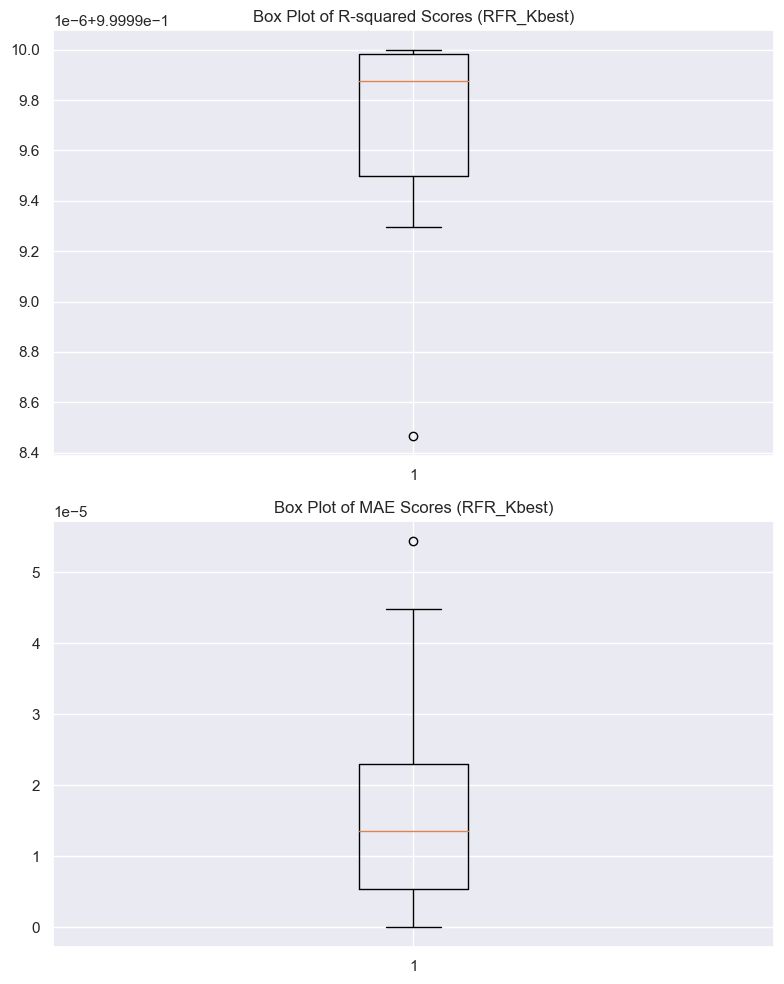

In [21]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Create box plots for R2 scores and MAE scores
axes[0].boxplot(r2_scores_RFR_Kbest)
axes[0].set_title("Box Plot of R-squared Scores (RFR_Kbest)")

axes[1].boxplot(mae_scores_RFR_Kbest)
axes[1].set_title("Box Plot of MAE Scores (RFR_Kbest)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Decision Tree Regression model for TTL using Kbest :**

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_DTR_Kbest = []
mae_scores_DTR_Kbest = []
mse_scores_DTR_Kbest = []
rmse_scores_DTR_Kbest = []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(selected_features_TTL_Kbest, y_TTL, test_size=0.2, random_state=i)

    # Train a Decision Tree Regression model on the selected features for TTL prediction
    model_TTL_Dtr = DecisionTreeRegressor(max_depth=None, random_state=0)  # You can adjust max_depth as needed
    model_TTL_Dtr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Dtr = model_TTL_Dtr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Dtr = mean_absolute_error(y_test_TTL, y_pred_TTL_Dtr)
    mse_TTL_Dtr = mean_squared_error(y_test_TTL, y_pred_TTL_Dtr)
    rmse_TTL_Dtr = mean_squared_error(y_test_TTL, y_pred_TTL_Dtr, squared=False)
    r2_TTL_Dtr = r2_score(y_test_TTL, y_pred_TTL_Dtr)

    # Append metrics to respective lists
    r2_scores_DTR_Kbest.append(r2_TTL_Dtr)
    mae_scores_DTR_Kbest.append(mae_TTL_Dtr)
    mse_scores_DTR_Kbest.append(mse_TTL_Dtr)
    rmse_scores_DTR_Kbest.append(rmse_TTL_Dtr)

# Calculate the average metrics
average_r2_DTR_Kbest = np.mean(r2_scores_DTR_Kbest)
average_mae_DTR_Kbest = np.mean(mae_scores_DTR_Kbest)
average_mse_DTR_Kbest = np.mean(mse_scores_DTR_Kbest)
average_rmse_DTR_Kbest = np.mean(rmse_scores_DTR_Kbest)

# Print the average metrics
print("Average R2 score:", average_r2_DTR_Kbest)
print("Average MAE:", average_mae_DTR_Kbest)
print("Average MSE:", average_mse_DTR_Kbest)
print("Average RMSE:", average_rmse_DTR_Kbest)

# # Append to lists
# scorelist_r2_bar.append(average_r2_DTR_Kbest)
# algorthim_r2_bar.append("DTR_Kbest")
# feature_r2_bar.append("TTL")

# scorelist_mae_bar.append(average_mae_DTR_Kbest)
# algorthim_mae_bar.append("DTR_Kbest")
# feature_mae_bar.append("TTL")

# scorelist_r2_box.append(r2_scores_DTR_Kbest)
# algorthim_r2_box.append("DTR_Kbest")
# feature_r2_box.append("TTL")

# scorelist_mae_box.append(mae_scores_DTR_Kbest)
# algorthim_mae_box.append("DTR_Kbest")
# feature_mae_box.append("TTL")


MAE.append(average_mae_DTR_Kbest)


Average R2 score: 0.9999997203814809
Average MAE: 9.077996005681759e-06
Average MSE: 9.077996005681759e-06
Average RMSE: 0.0019426096244866539


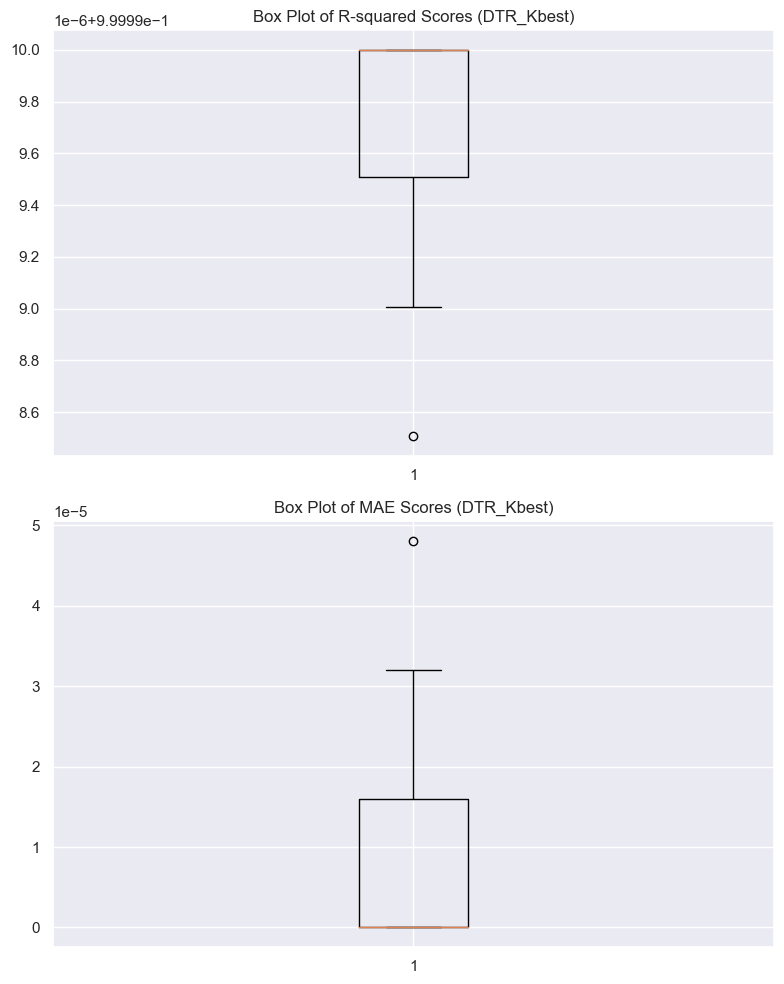

In [23]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Create box plots for R2 scores and MAE scores
axes[0].boxplot(r2_scores_DTR_Kbest)
axes[0].set_title("Box Plot of R-squared Scores (DTR_Kbest)")

axes[1].boxplot(mae_scores_DTR_Kbest)
axes[1].set_title("Box Plot of MAE Scores (DTR_Kbest)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Box plot show the R2 score for all the models with the Kbest feature selection**

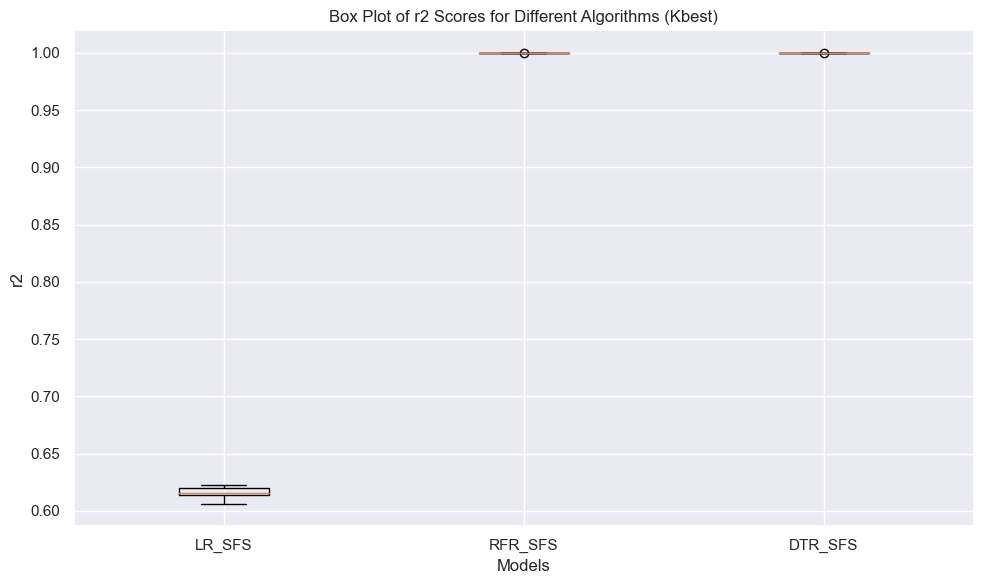

In [24]:
# Combine the data into a list
all_r2_scores = [r2_scores_Lr_Kbest , r2_scores_RFR_Kbest, r2_scores_DTR_Kbest]
labels = ['LR_SFS', 'RFR_SFS', 'DTR_SFS']

# Create a box plot
plt.figure(figsize=(10, 6))

# Plot the data as a box plot
plt.boxplot(all_r2_scores, labels=labels)

# Add labels and title
plt.xlabel("Models")
plt.ylabel("r2")
plt.title("Box Plot of r2 Scores for Different Algorithms (Kbest)")

# Show the plot
plt.tight_layout()
plt.show()







**Box plot show the mae score for all the models with the Kbest feature selection**

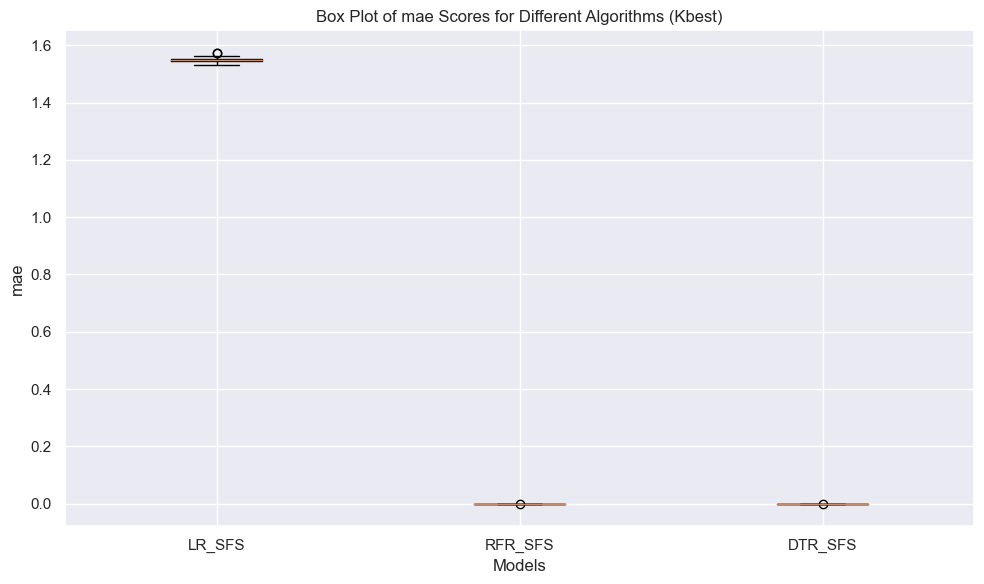

In [25]:
# Combine the data into a list
all_r2_scores = [mae_scores_Lr_Kbest , mae_scores_RFR_Kbest, mae_scores_DTR_Kbest]
labels = ['LR_SFS', 'RFR_SFS', 'DTR_SFS']

# Create a box plot
plt.figure(figsize=(10, 6))

# Plot the data as a box plot
plt.boxplot(all_r2_scores, labels=labels)

# Add labels and title
plt.xlabel("Models")
plt.ylabel("mae")
plt.title("Box Plot of mae Scores for Different Algorithms (Kbest)")

# Show the plot
plt.tight_layout()
plt.show()







**Sequential Feature Selector :**

In [26]:
from sklearn.feature_selection import SequentialFeatureSelector


#model = LinearRegression()
#sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
#sfs.fit(X_train_scaled_TTL, y_train_TTL)
#X_train_selected_TTL_SFS = sfs.transform(X_train_scaled_TTL)
#X_test_selected_TTL_SFS = sfs.transform(X_test_scaled_TTL)
#selected_features_TTL_SFS = X.columns[sfs.get_support()]
#print("Selected features:", selected_features_TTL_SFS)

In [27]:
X

Event      Time    S_Node   Node_id  Rest_Energy  Trace_Level  \
0       0.000000  0.000000  0.396985  0.396985     1.000000          0.0   
1       0.333333  0.000001  0.391960  0.391960     0.999854          0.0   
2       0.333333  0.000001  0.381910  0.381910     0.999854          0.0   
3       0.333333  0.000001  0.376884  0.376884     0.999854          0.0   
4       0.333333  0.000001  0.592965  0.592965     0.999854          0.0   
...          ...       ...       ...       ...          ...          ...   
312101  1.000000  0.966819  0.703518  0.703518     0.033212          0.0   
312102  1.000000  0.967825  0.703518  0.703518     0.032205          0.0   
312103  1.000000  0.968830  0.703518  0.703518     0.031199          0.0   
312104  1.000000  0.969836  0.703518  0.703518     0.030192          0.0   
312105  1.000000  1.000000  0.703518  0.703518     0.000000          0.0   

        Mac_Type_Pckt  Source_IP_Port  Des_IP_Port  Packet_Size  ...  \
0                 0.0        0.396985          0.0          0.0  ...   
1                 1.0        0.396985          0.0          0.0  ...   
2                 1.0        0.396985          0.0          0.0  ...   
3                 1.0        0.396985          0.0          0.0  ...   
4                 1.0        0.396985          0.0          0.0  ...   
...               ...             ...          ...          ...  ...   
312101            1.0        0.703518          0.0          0.0  ...   
312102            1.0        0.703518          0.0          0.0  ...   
312103            1.0        0.703518          0.0          0.0  ...   
312104            1.0        0.703518          0.0          0.0  ...   
312105            1.0        0.703518          0.0          0.0  ...   

        Broadcast_ID  Dest_Node_Num  Dest_Seq_Num  Src_Node_ID  Src_Seq_Num  \
0           0.000000       0.392638      0.000000     0.420213     0.000000   
1           0.000000       0.392638      0.000000     0.420213     0.000000   
2           0.000000       0.392638      0.000000     0.420213     0.000000   
3           0.000000       0.392638      0.000000     0.420213     0.000000   
4           0.000000       0.392638      0.000000     0.420213     0.000000   
...              ...            ...           ...          ...          ...   
312101      0.434783       0.392638      0.941176     0.744681     0.457143   
312102      0.463768       0.392638      0.941176     0.744681     0.485714   
312103      0.492754       0.392638      0.941176     0.744681     0.514286   
312104      0.521739       0.392638      0.941176     0.744681     0.542857   
312105      0.594203       0.392638      0.941176     0.744681     0.614286   

        behaviour      Type  rate_of_energy_consumption  \
0             0.0  0.000000                     0.00000   
1             0.0  0.000000                     0.00000   
2             0.0  0.000000                     0.00000   
3             0.0  0.000000                     0.00000   
4             0.0  0.000000                     0.00000   
...           ...       ...                         ...   
312101        1.0  0.666667                     0.00149   
312102        1.0  0.666667                     0.00149   
312103        1.0  0.666667                     0.00149   
312104        1.0  0.666667                     0.00149   
312105        1.0  0.666667                     0.00149   

        cumulative_energy_consumption  energy_consumption  
0                            0.000000            0.000000  
1                            0.000000            0.000000  
2                            0.000000            0.000000  
3                            0.000000            0.000000  
4                            0.000000            0.000000  
...                               ...                 ...  
312101                       0.966783            0.018874  
312102                       0.967790            0.018874  
312103                       0.9687

In [28]:
# Feature selection using Sequential Feature Selector
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=15, direction='forward')
sfs.fit(X, y_TTL)
selected_features_TTL_SFS = X.columns[sfs.get_support()]

# Transform data to include only selected features
X_lr = sfs.transform(X)


print("Selected features:", selected_features_TTL_SFS)

Selected features: Index(['Event', 'S_Node', 'Node_id', 'Trace_Level', 'Mac_Type_Pckt',
       'Source_IP_Port', 'Des_IP_Port', 'Packet_Size', 'Hop_Count',
       'Dest_Node_Num', 'Src_Node_ID', 'behaviour', 'Type',
       'rate_of_energy_consumption', 'energy_consumption'],
      dtype='object')


**Linear regression model for TTL using Kbest using SFS**

In [29]:
import numpy as np

# Initialize lists to store results
mae_scores_Lr_SFS = []
mse_scores_Lr_SFS = []
rmse_scores_Lr_SFS = []
r2_scores_Lr_SFS = []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X_lr, y_TTL, test_size=0.2, random_state=i)
    # Train a linear regression model on the selected features for TTL prediction
    model_TTL_Lr = LinearRegression()
    model_TTL_Lr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_Lr = model_TTL_Lr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_Lr_SFS = mean_absolute_error(y_test_TTL, y_pred_TTL_Lr)
    mse_TTL_Lr_SFS = mean_squared_error(y_test_TTL, y_pred_TTL_Lr)
    rmse_TTL_Lr_SFS = mean_squared_error(y_test_TTL, y_pred_TTL_Lr, squared=False)
    r2_TTL_Lr_SFS = r2_score(y_test_TTL, y_pred_TTL_Lr)

    # Append metrics to respective lists
    mae_scores_Lr_SFS.append(mae_TTL_Lr_SFS)
    mse_scores_Lr_SFS.append(mse_TTL_Lr_SFS)
    rmse_scores_Lr_SFS.append(rmse_TTL_Lr_SFS)
    r2_scores_Lr_SFS.append(r2_TTL_Lr_SFS)

# Calculate the average metrics
average_mae_Lr_SFS = np.mean(mae_scores_Lr_SFS)
average_mse_Lr_SFS = np.mean(mse_scores_Lr_SFS)
average_rmse_Lr_SFS = np.mean(rmse_scores_Lr_SFS)
average_r2_Lr_SFS = np.mean(r2_scores_Lr_SFS)

# # Append to lists
# scorelist_r2_bar.append(average_r2_Lr_SFS)
# algorthim_r2_bar.append("LR_SFS")
# feature_r2_bar.append("TTL")

MAE.append(average_mae_Lr_SFS)

# # Append to lists
# scorelist_mae_bar.append(average_mae_Lr_SFS)
# algorthim_mae_bar.append("LR_SFS")
# feature_mae_bar.append("TTL")

# # Append to lists
# scorelist_r2_box.append(r2_scores_Lr_SFS)
# algorthim_r2_box.append("LR_SFS")
# feature_r2_box.append("TTL")

# # Append to lists
# scorelist_mae_box.append(mae_scores_Lr_SFS)
# algorthim_mae_box.append("LR_SFS")
# feature_mae_box.append("TTL")

# Print the average metrics
print("Average MAE for TTL prediction:", average_mae_Lr_SFS)
print("Average MSE for TTL prediction:", average_mse_Lr_SFS)
print("Average RMSE for TTL prediction:", average_rmse_Lr_SFS)
print("Average R2 for TTL prediction:", average_r2_Lr_SFS)

Average MAE for TTL prediction: 1.9407518291771404
Average MSE for TTL prediction: 16.643873484039986
Average RMSE for TTL prediction: 4.079625780197953
Average R2 for TTL prediction: 0.4887280553634296


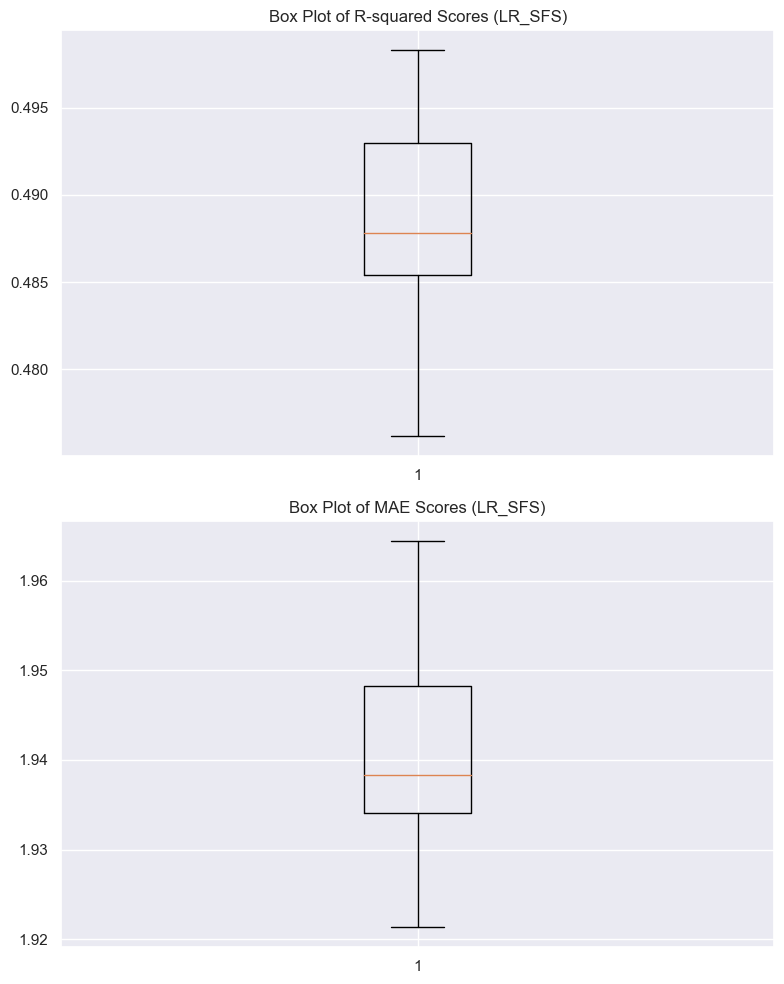

In [56]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Create box plots for R2 scores and MAE scores
axes[0].boxplot(r2_scores_Lr_SFS)
axes[0].set_title("Box Plot of R-squared Scores (LR_SFS)")

axes[1].boxplot(mae_scores_Lr_SFS)
axes[1].set_title("Box Plot of MAE Scores (LR_SFS)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**KNN model for TTL using SFS :**

In [31]:
# # Feature selection using Sequential Feature Selector
# model = KNeighborsRegressor()
# sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
# sfs.fit(X, y_TTL)
# selected_features_TTL_SFS = X.columns[sfs.get_support()]

# # Transform data to include only selected features
# X_knn = sfs.transform(X)


# print("Selected features:", selected_features_TTL_SFS)

In [32]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Initialize lists to store results
# r2_scores_Knn_SFS = []
# mae_scores_Knn_SFS= []
# mse_scores_Knn_SFS= []
# rmse_scores_Knn_SFS= []

# # Perform the process for 30 runs
# for i in range(30):
#     X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X_knn, y_TTL, test_size=0.2, random_state=i)
#      #Train a KNN model on the selected features for TTL prediction
#     model_TTL_knn = KNeighborsRegressor(n_neighbors=3)
#     model_TTL_knn.fit(X_train_TTL, y_train_TTL)

#     # Make predictions on the testing set for TTL prediction
#     y_pred_TTL_knn = model_TTL_knn.predict(X_test_TTL)

#     # Calculate regression metrics for TTL prediction
#     mae_TTL_knn_SFS = mean_absolute_error(y_test_TTL, y_pred_TTL_knn)
#     mse_TTL_knn_SFS = mean_squared_error(y_test_TTL, y_pred_TTL_knn)
#     rmse_TTL_knn_SFS = mean_squared_error(y_test_TTL, y_pred_TTL_knn, squared=False)
#     r2_TTL_knn_SFS = r2_score(y_test_TTL, y_pred_TTL_knn)

#     # Append metrics to respective lists
#     r2_scores_Knn_SFS.append(r2_TTL_knn_SFS)
#     mae_scores_Knn_SFS.append(mae_TTL_knn_SFS)
#     mse_scores_Knn_SFS.append(mse_TTL_knn_SFS)
#     rmse_scores_Knn_SFS.append(rmse_TTL_knn_SFS)

# # Calculate the average metrics
# average_r2_Knn_SFS = np.mean(r2_scores_Knn_SFS)
# average_mae_Knn_SFS = np.mean(mae_scores_Knn_SFS)
# average_mse_Knn_SFS = np.mean(mse_scores_Knn_SFS)
# average_rmse_Knn_SFS = np.mean(rmse_scores_Knn_SFS)



# # Append to lists
# #scorelist_r2_bar.append(average_r2_Knn_SFS)
# #algorthim_r2_bar.append("KNN_SFS")
# #feature_r2_bar.append("TTL")

# #MAE.append(average_mae_Lr_SFS)

# # Append to lists
# #scorelist_mae_bar.append(average_mae_Knn_SFS)
# #algorthim_mae_bar.append("KNN_SFS")
# #feature_mae_bar.append("TTL")

# # Append to lists
# #scorelist_r2_box.append(r2_scores_Knn_SFS)
# #algorthim_r2_box.append("KNN_SFS")
# #feature_r2_box.append("TTL")

# # Append to lists
# #scorelist_mae_box.append(mae_scores_Knn_SFS)
# #algorthim_mae_box.append("KNN_SFS")
# #feature_mae_box.append("TTL")


# MAE_1.append(average_mae_Knn_SFS)

# # Print the average metrics
# print("Average R2 score:", average_r2_Knn_SFS)
# print("Average MAE:", average_mae_Knn_SFS)
# print("Average MSE:", average_mse_Knn_SFS)
# print("Average RMSE:", average_rmse_Knn_SFS)


In [33]:
# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# # Create box plots for R2 scores and MAE scores
# axes[0].boxplot(r2_scores_Knn_SFS)
# axes[0].set_title("Box Plot of R-squared Scores (Knn_SFS)")

# axes[1].boxplot(mae_scores_Knn_SFS)
# axes[1].set_title("Box Plot of MAE Scores (Knn_Kbest)")

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

**Random Forest Regressor model for TTL using SFS :**

In [34]:
# Feature selection using Sequential Feature Selector
model = RandomForestRegressor(n_estimators=20)
sfs = SequentialFeatureSelector(model, n_features_to_select=15, direction='forward')
sfs.fit(X, y_TTL)
selected_features_TTL_SFS = X.columns[sfs.get_support()]

# Transform data to include only selected features
X_rf = sfs.transform(X)


print("Selected features:", selected_features_TTL_SFS)

Selected features: Index(['Event', 'Time', 'S_Node', 'Rest_Energy', 'Trace_Level',
       'Mac_Type_Pckt', 'Source_IP_Port', 'Des_IP_Port', 'Hop_Count',
       'Src_Node_ID', 'behaviour', 'Type', 'rate_of_energy_consumption',
       'cumulative_energy_consumption', 'energy_consumption'],
      dtype='object')


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_rfr_SFS = []
mae_scores_rfr_SFS = []
mse_scores_rfr_SFS = []
rmse_scores_rfr_SFS = []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X_rf, y_TTL, test_size=0.2, random_state=i)

    # Train a Random Forest Regressor model on the selected features for TTL prediction
    model_TTL_rfr = RandomForestRegressor(n_estimators=20, random_state=0)
    model_TTL_rfr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_rfr = model_TTL_rfr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_rfr = mean_absolute_error(y_test_TTL, y_pred_TTL_rfr)
    mse_TTL_rfr = mean_squared_error(y_test_TTL, y_pred_TTL_rfr)
    rmse_TTL_rfr = mean_squared_error(y_test_TTL, y_pred_TTL_rfr, squared=False)
    r2_TTL_rfr = r2_score(y_test_TTL, y_pred_TTL_rfr)

    # Append metrics to respective lists
    r2_scores_rfr_SFS.append(r2_TTL_rfr)
    mae_scores_rfr_SFS.append(mae_TTL_rfr)
    mse_scores_rfr_SFS.append(mse_TTL_rfr)
    rmse_scores_rfr_SFS.append(rmse_TTL_rfr)

# Calculate the average metrics
average_r2_rfr_SFS = np.mean(r2_scores_rfr_SFS)
average_mae_rfr_SFS = np.mean(mae_scores_rfr_SFS)
average_mse_rfr_SFS = np.mean(mse_scores_rfr_SFS)
average_rmse_rfr_SFS = np.mean(rmse_scores_rfr_SFS)

# Print the average metrics
print("Average R2 score:", average_r2_rfr_SFS)
print("Average MAE:", average_mae_rfr_SFS)
print("Average MSE:", average_mse_rfr_SFS)
print("Average RMSE:", average_rmse_rfr_SFS)


# # Append to lists
# scorelist_r2_bar.append(average_r2_rfr_SFS)
# algorthim_r2_bar.append("rfr_SFS")
# feature_r2_bar.append("TTL")

# # Append to lists
# scorelist_mae_bar.append(average_mae_rfr_SFS)
# algorthim_mae_bar.append("rfr_SFS")
# feature_mae_bar.append("TTL")

# # Append to lists
# scorelist_r2_box.append(r2_scores_rfr_SFS)
# algorthim_r2_box.append("rfr_SFS")
# feature_r2_box.append("TTL")

# # Append to lists
# scorelist_mae_box.append(mae_scores_rfr_SFS)
# algorthim_mae_box.append("rfr_SFS")
# feature_mae_box.append("TTL")

MAE.append(average_mae_rfr_SFS)


Average R2 score: 0.9996619275842528
Average MAE: 0.001126953104140634
Average MSE: 0.011008437196287635
Average RMSE: 0.098978241769149


In [54]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Create box plots for R2 scores and MAE scores
axes[0].boxplot(r2_scores_rfr_SFS)
axes[0].set_title("Box Plot of R-squared Scores (RFR_SFS)")

axes[1].boxplot(mae_scores_rfr_SFS)
axes[1].set_title("Box Plot of MAE Scores (RFR_SFS)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Decision Tree Regression model for TTL using SFS :**

In [37]:
# Feature selection using Sequential Feature Selector
model = DecisionTreeRegressor()
sfs = SequentialFeatureSelector(model, n_features_to_select=15, direction='forward')
sfs.fit(X, y_TTL)
selected_features_TTL_SFS = X.columns[sfs.get_support()]

# Transform data to include only selected features
X_df = sfs.transform(X)


print("Selected features:", selected_features_TTL_SFS)

Selected features: Index(['Event', 'Time', 'S_Node', 'Node_id', 'Rest_Energy', 'Trace_Level',
       'Mac_Type_Pckt', 'Source_IP_Port', 'Des_IP_Port', 'Packet_Size',
       'Hop_Count', 'Dest_Node_Num', 'Src_Node_ID', 'behaviour', 'Type'],
      dtype='object')


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize lists to store results
r2_scores_dtr_SFS = []
mae_scores_dtr_SFS = []
mse_scores_dtr_SFS = []
rmse_scores_dtr_SFS = []

# Perform the process for 30 runs
for i in range(30):
    X_train_TTL, X_test_TTL, y_train_TTL, y_test_TTL = train_test_split(X_df, y_TTL, test_size=0.2, random_state=i)
    # Train a Decision Tree Regression model on the selected features for TTL prediction
    model_TTL_dtr = DecisionTreeRegressor(max_depth=None, random_state=0)
    model_TTL_dtr.fit(X_train_TTL, y_train_TTL)

    # Make predictions on the testing set for TTL prediction
    y_pred_TTL_dtr = model_TTL_dtr.predict(X_test_TTL)

    # Calculate regression metrics for TTL prediction
    mae_TTL_dtr = mean_absolute_error(y_test_TTL, y_pred_TTL_dtr)
    mse_TTL_dtr = mean_squared_error(y_test_TTL, y_pred_TTL_dtr)
    rmse_TTL_dtr = mean_squared_error(y_test_TTL, y_pred_TTL_dtr, squared=False)
    r2_TTL_dtr = r2_score(y_test_TTL, y_pred_TTL_dtr)

    # Append metrics to respective lists
    r2_scores_dtr_SFS.append(r2_TTL_dtr)
    mae_scores_dtr_SFS.append(mae_TTL_dtr)
    mse_scores_dtr_SFS.append(mse_TTL_dtr)
    rmse_scores_dtr_SFS.append(rmse_TTL_dtr)

# Calculate the average metrics
average_r2_dtr_SFS = np.mean(r2_scores_dtr_SFS)
average_mae_dtr_SFS = np.mean(mae_scores_dtr_SFS)
average_mse_dtr_SFS = np.mean(mse_scores_dtr_SFS)
average_rmse_dtr_SFS = np.mean(rmse_scores_dtr_SFS)

# Print the average metrics
print("Average R2 score:", average_r2_dtr_SFS)
print("Average MAE:", average_mae_dtr_SFS)
print("Average MSE:", average_mse_dtr_SFS)
print("Average RMSE:", average_rmse_dtr_SFS)

# # Append to lists
# scorelist_r2_bar.append(average_r2_dtr_SFS)
# algorthim_r2_bar.append("dtr_SFS")
# feature_r2_bar.append("TTL")

# # Append to lists
# scorelist_mae_bar.append(average_mae_dtr_SFS)
# algorthim_mae_bar.append("dtr_SFS")
# feature_mae_bar.append("TTL")

# # Append to lists
# scorelist_r2_box.append(r2_scores_dtr_SFS)
# algorthim_r2_box.append("dtr_SFS")
# feature_r2_box.append("TTL")

# # Append to lists
# scorelist_mae_box.append(mae_scores_dtr_SFS)
# algorthim_mae_box.append("dtr_SFS")
# feature_mae_box.append("TTL")

MAE.append(average_mae_dtr_SFS)

Average R2 score: 0.9999998531309144
Average MAE: 3.7379983552807238e-06
Average MSE: 4.805997885360931e-06
Average RMSE: 0.0009339162790272845


In [51]:
r2_scores_dtr_SFS

[1.0,
 1.0,
 1.0,
 0.999999514263474,
 0.9999995121827382,
 0.9999995066809996,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999995144130522,
 1.0,
 0.9999995021386436,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999980442485258,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

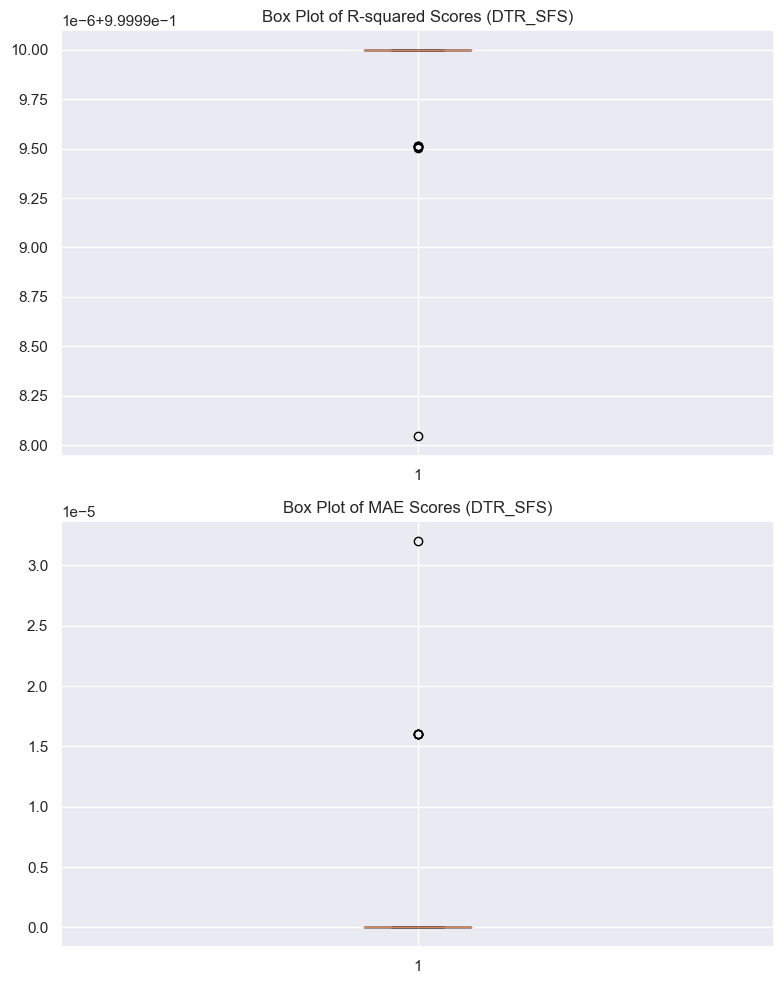

In [55]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Create box plots for R2 scores and MAE scores
axes[0].boxplot(r2_scores_dtr_SFS)
axes[0].set_title("Box Plot of R-squared Scores (DTR_SFS)")

axes[1].boxplot(mae_scores_dtr_SFS)
axes[1].set_title("Box Plot of MAE Scores (DTR_SFS)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Box plot show the R2 score for all the models with the SFS feature selection**

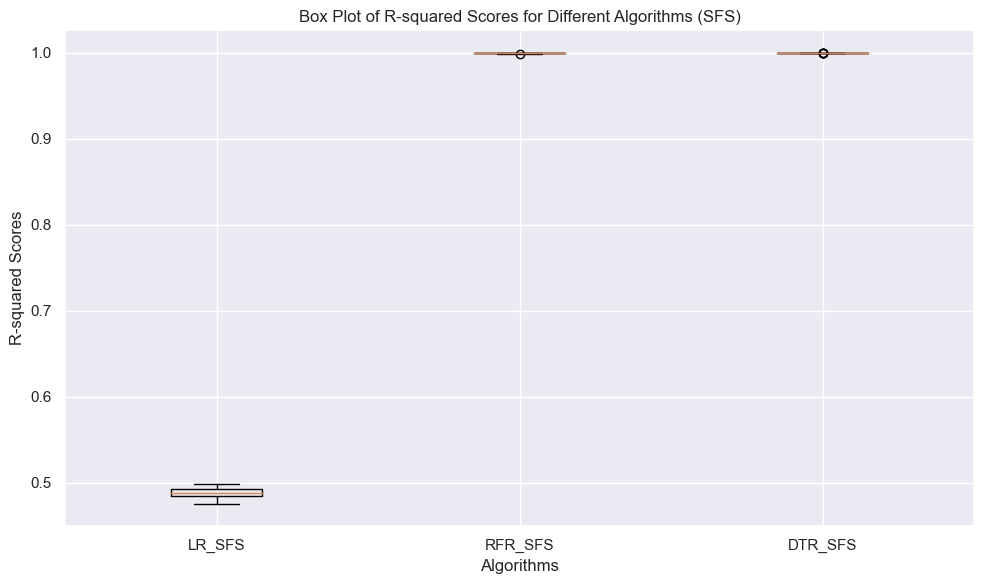

In [40]:
# Combine the data into a list
all_r2_scores = [r2_scores_Lr_SFS , r2_scores_rfr_SFS, r2_scores_dtr_SFS]
labels = ['LR_SFS', 'RFR_SFS', 'DTR_SFS',]

# Create a box plot
plt.figure(figsize=(10, 6))

# Plot the data as a box plot
plt.boxplot(all_r2_scores, labels=labels)

# Add labels and title
plt.xlabel("Algorithms")
plt.ylabel("R-squared Scores")
plt.title("Box Plot of R-squared Scores for Different Algorithms (SFS)")

# Show the plot
plt.tight_layout()
plt.show()







**Box plot show the mae score for all the models with the SFS feature selection**

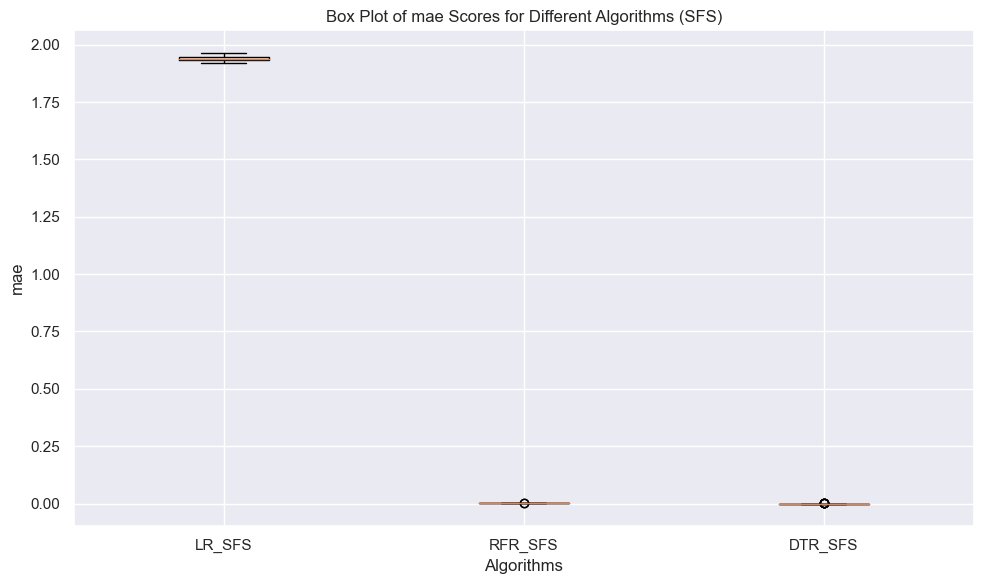

In [41]:
# Combine the data into a list
all_r2_scores = [mae_scores_Lr_SFS , mae_scores_rfr_SFS, mae_scores_dtr_SFS]
labels = ['LR_SFS', 'RFR_SFS', 'DTR_SFS']

# Create a box plot
plt.figure(figsize=(10, 6))

# Plot the data as a box plot
plt.boxplot(all_r2_scores, labels=labels)

# Add labels and title
plt.xlabel("Algorithms")
plt.ylabel("mae")
plt.title("Box Plot of mae Scores for Different Algorithms (SFS)")

# Show the plot
plt.tight_layout()
plt.show()







**Evaluation metrics using SelectKBest and SFS feature selection techniques show the mae :**

In [42]:
# # Mean_Absolute_Error for Each Feature & Algorthim :)
# Mean_Absolute_Error = pd.DataFrame({"feature":pd.Series(feature_mae_bar),"algorthim":pd.Series(algorthim_mae_bar),"MAE":pd.Series(MAE)})
# Mean_Absolute_Error

NameError: name 'feature_mae_bar' is not defined

**Evaluation metrics using Sequential Feature Selector feature selection technique :**

In [ ]:
# Mean_Absolute_Error for Each Feature & Algorthim :)
#Mean_Absolute_Error = pd.DataFrame({"feature":pd.Series(feature_1),"algorthim":pd.Series(algorthim_1),"MAE":pd.Series(MAE_1)})
#Mean_Absolute_Error

**The performance based on the R2 of each predictive model on predicting TTL using SelectKBest and SFS feature selection techniques  :**

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
selectkbest_r2 = [average_r2_Lr_Kbest, average_r2_DTR_Kbest, average_r2_RFR_Kbest]
SFS_r2 = [average_r2_Lr_SFS, average_r2_dtr_SFS, average_r2_rfr_SFS]

x = np.arange(len(models))  # The Label locations
width = 0.35  # The width of the bars

# Create a single bar plot comparing R2 values using SelectKBest and RFE
plt.figure(figsize=(10, 6))

rects1 = plt.bar(x - width/2, selectkbest_r2, width, label='SelectKBest')
rects2 = plt.bar(x + width/2, SFS_r2, width, label='SFS')

# Add labels and title
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Comparison of R2 Scores using SelectKBest and SFS")
plt.xticks(x, models, rotation=45, ha="right")

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**The performance based on the mae of each predictive model on predicting TTL using SelectKBest and SFS feature selection techniques  :**

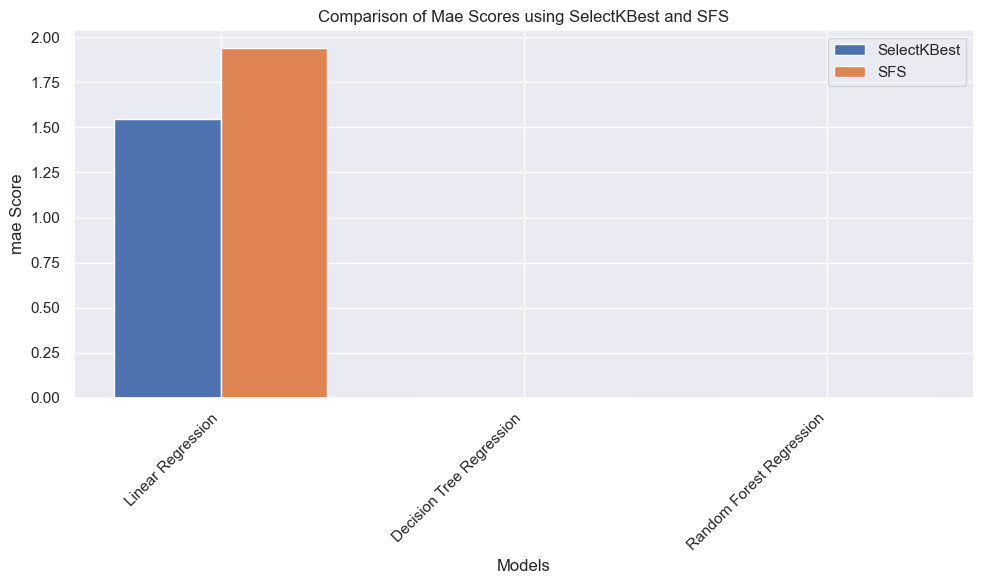

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
selectkbest_mae = [average_mae_Lr_Kbest, average_mae_DTR_Kbest, average_mae_RFR_Kbest]
SFS_mae = [average_mae_Lr_SFS, average_mae_dtr_SFS, average_mae_rfr_SFS]

x = np.arange(len(models))  # The Label locations
width = 0.35  # The width of the bars

# Create a single bar plot comparing R2 values using SelectKBest and RFE
plt.figure(figsize=(10, 6))

rects1 = plt.bar(x - width/2, selectkbest_mae, width, label='SelectKBest')
rects2 = plt.bar(x + width/2, SFS_mae, width, label='SFS')

# Add labels and title
plt.xlabel("Models")
plt.ylabel("mae Score")
plt.title("Comparison of Mae Scores using SelectKBest and SFS")
plt.xticks(x, models, rotation=45, ha="right")

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


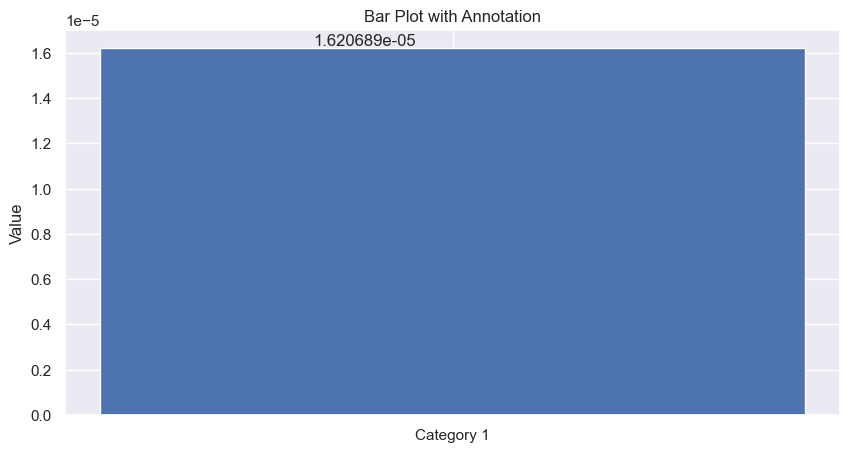